### Here I calculate the Chern number using Fukui-Hatsugai method

Todo: Write some code to plots bands given Delta and m_0

In [1]:
using LinearAlgebra
using Plots
using LaTeXStrings
using CSV
using DataFrames
#plotlyjs()

In [2]:
sigma_x = [0 1;
           1 0];
sigma_y = [0 -im;
           im 0];
sigma_z = [1 0;
           0 -1];
eye2 = [1 0;
        0 1];
gamma_01 = kron(eye2, sigma_x);
gamma_02 = kron(eye2, sigma_y);
gamma_03 = kron(eye2, sigma_z);
gamma_13 = kron(sigma_x,sigma_z);
gamma_30 = kron(sigma_z, eye2);
gamma_31 = kron(sigma_z, sigma_x);
gamma_32 = kron(sigma_z, sigma_y);
gamma_33 = kron(sigma_z, sigma_z);

exportdata=1;

In [3]:
function H0(px::Float64,py::Float64,t::Float64,t0::Float64,m_0::Float64,Delta::Float64,mu::Float64)
    return  t*sin(px) *gamma_01 + t*sin(py)*gamma_02 + (m_0- t0*(cos(px) + cos(py)))*gamma_03 + Delta*gamma_13 -mu*gamma_30
end

H0 (generic function with 1 method)

In [4]:
function band_plot_super(t::Float64,t0::Float64,m_0::Float64,Delta::Float64,mu::Float64)
    nn=100;
    x1 = range(0,pi,nn);
	y1 = range(0,0,nn);

	x2 = range(pi,pi,nn);
	y2 = range(0,pi,nn);

	x3 = range(pi,0,nn);
	y3 = range(pi,0,nn);

    E1_1 = zeros(nn)
    E1_2 = zeros(nn)
    E1_3 = zeros(nn)

    E2_1 = zeros(nn)
    E2_2 = zeros(nn)
    E2_3 = zeros(nn)

    E3_1 = zeros(nn)
    E3_2 = zeros(nn)
    E3_3 = zeros(nn)

    E4_1 = zeros(nn)
    E4_2 = zeros(nn)
    E4_3 = zeros(nn)

    vals1 = zeros(4)
    vals2 = zeros(4)
    vals3 = zeros(4)

    for ii = 1:nn
        vals1 = eigvals(H0(x1[ii],y1[ii],t,t0,m_0,Delta,mu))
        E1_1[ii] = vals1[1]
        E2_1[ii] = vals1[2]
        E3_1[ii] = vals1[3]
        E4_1[ii] = vals1[4]

        vals2 = eigvals(H0(x2[ii],y2[ii],t,t0,m_0,Delta,mu))
        E1_2[ii] = vals2[1]
        E2_2[ii] = vals2[2]
        E3_2[ii] = vals2[3]
        E4_2[ii] = vals2[4]

        vals3 = eigvals(H0(x3[ii],y3[ii],t,t0,m_0,Delta,mu))
        E1_3[ii] = vals3[1]
        E2_3[ii] = vals3[2]
        E3_3[ii] = vals3[3]
        E4_3[ii] = vals3[4]
    end


    xtick_positions = [1,nn,2*nn,3*nn]
    xtick_labels = [L"\Gamma", L"X", L"M", L"\Gamma"]
    fig1 = plot(1:nn,E1_1, color="red", ylims=(minimum([minimum(E1_1),minimum(E1_2),minimum(E1_3)])-0.3,maximum([maximum(E4_1),maximum(E4_2),maximum(E4_3)])+0.3),legend=false,xticks=(xtick_positions,xtick_labels),tickfontsize=15,tickfont=font(15, "Computer Modern"),title="H_BdG Bandstructure",ylabel=L"\epsilon_k", guidefont=font(20, "Computer Modern"))
    #fig1 = plot(1:nn,E1_1, color="red", ylims=(-1.0,1.0),legend=false,xticks=(xtick_positions,xtick_labels),tickfontsize=15,tickfont=font(15, "Computer Modern"),title="H_BdG Bandstructure",ylabel=L"\epsilon_k", guidefont=font(20, "Computer Modern"))
    fig1 = plot!(1:nn,E2_1, color="blue")
    fig1 = plot!(1:nn,E3_1, color="green")
    fig1 = plot!(1:nn,E4_1, color="black")

    fig1 = plot!(nn+1:2*nn,E1_2, color="red")
    fig1 = plot!(nn+1:2*nn,E2_2, color="blue")
    fig1 = plot!(nn+1:2*nn,E3_2, color="green")
    fig1 = plot!(nn+1:2*nn,E4_2, color="black")

    fig1 = plot!(2*nn+1:3*nn,E1_3, color="red")
    fig1 = plot!(2*nn+1:3*nn,E2_3, color="blue")
    fig1 = plot!(2*nn+1:3*nn,E3_3, color="green")
    fig1 = plot!(2*nn+1:3*nn,E4_3, color="black")
end

band_plot_super (generic function with 1 method)

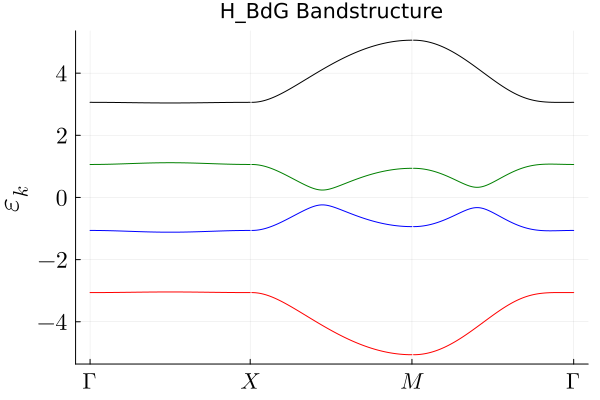

In [5]:
band_plot_super(1.,1.,1.,0.5,2.0)

In [7]:
function plot_phase_diagram(mumu)

NBands = 4;
NGridpts = 31;

plim = pi
px_array = range(-plim,plim,NGridpts);
py_array = range(-plim,plim,NGridpts);

band = zeros(NBands,NGridpts,NGridpts)*im;
eigenvec_1 = zeros(NBands,NGridpts,NGridpts)*im; #This ensures that the vector can accept complex values
eigenvec_2 = zeros(NBands,NGridpts,NGridpts)*im; #This ensures that the vector can accept complex values
eigenvec_3 = zeros(NBands,NGridpts,NGridpts)*im; #This ensures that the vector can accept complex values
eigenvec_4 = zeros(NBands,NGridpts,NGridpts)*im; #This ensures that the vector can accept complex values
vec=zeros(NBands,NBands)*im;
berry_curv1=zeros(NGridpts,NGridpts)*im;
berry_curv2=zeros(NGridpts,NGridpts)*im;
berry_curv3=zeros(NGridpts,NGridpts)*im;
berry_curv4=zeros(NGridpts,NGridpts)*im;


t0 = 1.0;
tt = 1.0;

Nplotpts = 121;
Delta_array = range(0,5,Nplotpts);
m0_array = range(-5.0,5.0,Nplotpts);

Chern_array1 = zeros(Nplotpts,Nplotpts);
Chern_array2 = zeros(Nplotpts,Nplotpts);
Chern_array3 = zeros(Nplotpts,Nplotpts);
Chern_array4 = zeros(Nplotpts,Nplotpts);


results1 = DataFrame(m_0=Float64[], Delta=Float64[], Chern_number=Float64[]);
results2 = DataFrame(m_0=Float64[], Delta=Float64[], Chern_number=Float64[]);
results3 = DataFrame(m_0=Float64[], Delta=Float64[], Chern_number=Float64[]);
results4 = DataFrame(m_0=Float64[], Delta=Float64[], Chern_number=Float64[]);

for iii=1:Nplotpts
    @time for jjj=1:Nplotpts

## Here I calculate the band energy for each (px,py) and find the eigenvector of the valence band
for ii = 1:NGridpts
    for jj = 1:NGridpts
        #if(ishermitian(H0(px_array[ii],py_array[jj],1.0,1.0,1.0))==false)
        #    println(ii)
        #    println(jj)
        #end
        band[:,ii,jj],vec=eigen(H0(px_array[ii],py_array[jj],tt,t0,m0_array[jjj],Delta_array[iii],mumu));
        eigenvec_1[:,ii,jj] = vec[:,1];
        eigenvec_2[:,ii,jj] = vec[:,2];
        eigenvec_3[:,ii,jj] = vec[:,3];
        eigenvec_4[:,ii,jj] = vec[:,4];
    end
end

for ii = 1:(NGridpts-1)#Just to get rid of boundary term
    for jj = 1:(NGridpts-1)
        a1=0.0*im;
        a1 = (eigenvec_1[:,ii,jj+1]'*eigenvec_1[:,ii,jj])*(eigenvec_1[:,ii,jj]'*eigenvec_1[:,ii+1,jj])*(eigenvec_1[:,ii+1,jj]'*eigenvec_1[:,ii+1,jj+1])*(eigenvec_1[:,ii+1,jj+1]'*eigenvec_1[:,ii,jj+1])
        berry_curv1[ii,jj] = imag(log(a1/abs(a1)))

        a2=0.0*im;
        a2 = (eigenvec_2[:,ii,jj+1]'*eigenvec_2[:,ii,jj])*(eigenvec_2[:,ii,jj]'*eigenvec_2[:,ii+1,jj])*(eigenvec_2[:,ii+1,jj]'*eigenvec_2[:,ii+1,jj+1])*(eigenvec_2[:,ii+1,jj+1]'*eigenvec_2[:,ii,jj+1])
        berry_curv2[ii,jj] = imag(log(a2/abs(a2)))

        a3=0.0*im;
        a3 = (eigenvec_3[:,ii,jj+1]'*eigenvec_3[:,ii,jj])*(eigenvec_3[:,ii,jj]'*eigenvec_3[:,ii+1,jj])*(eigenvec_3[:,ii+1,jj]'*eigenvec_3[:,ii+1,jj+1])*(eigenvec_3[:,ii+1,jj+1]'*eigenvec_3[:,ii,jj+1])
        berry_curv3[ii,jj] = imag(log(a3/abs(a3)))

        a4=0.0*im;
        a4 = (eigenvec_4[:,ii,jj+1]'*eigenvec_4[:,ii,jj])*(eigenvec_4[:,ii,jj]'*eigenvec_4[:,ii+1,jj])*(eigenvec_4[:,ii+1,jj]'*eigenvec_4[:,ii+1,jj+1])*(eigenvec_4[:,ii+1,jj+1]'*eigenvec_4[:,ii,jj+1])
        berry_curv4[ii,jj] = imag(log(a4/abs(a4)))
    end
end


Chern_Number1 = sum(x -> !isnan(x) ? x : 0, real(berry_curv1))/(2*pi)

Chern_array1[jjj,iii] = Chern_Number1


Chern_Number2 = sum(x -> !isnan(x) ? x : 0, real(berry_curv2))/(2*pi)

Chern_array2[jjj,iii] = Chern_Number2


Chern_Number3 = sum(x -> !isnan(x) ? x : 0, real(berry_curv3))/(2*pi)

Chern_array3[jjj,iii] = Chern_Number3


Chern_Number4 = sum(x -> !isnan(x) ? x : 0, real(berry_curv4))/(2*pi)

Chern_array4[jjj,iii] = Chern_Number4

push!(results1, (m0_array[jjj], Delta_array[iii], Chern_Number1))
push!(results2, (m0_array[jjj], Delta_array[iii], Chern_Number2))
push!(results3, (m0_array[jjj], Delta_array[iii], Chern_Number3))
push!(results4, (m0_array[jjj], Delta_array[iii], Chern_Number4))

end
println(iii)
end

plt2 = heatmap(m0_array, Delta_array, Chern_array1'+Chern_array2', color = :rainbow, xlabel="m0/t", ylabel="Delta/t", title="Sum of Chern Number band 1 + band 2 Fukui-Hatsugai")
filename = 
savefig(plt2,string("mu=",mumu,".png"))
plt3 = heatmap(m0_array, Delta_array, Chern_array1', color = :rainbow, xlabel="m0/t", ylabel="Delta/t", title="Sum of Chern Number band 1 + band 2 Fukui-Hatsugai")
filename = 
savefig(plt3,string("band1mu=",mumu,".png"))
plt4 = heatmap(m0_array, Delta_array, Chern_array2', color = :rainbow, xlabel="m0/t", ylabel="Delta/t", title="Sum of Chern Number band 1 + band 2 Fukui-Hatsugai")
filename = 
savefig(plt4,string("band2mu=",mumu,".png"))

# Define the folder path (relative or absolute)
folder_path = "data/topo_super/"  # Change to your desired folder
# Ensure the folder exists
isdir(folder_path) || mkdir(folder_path)

filename = "t0=$(t0)_t=$(tt)_mu=$(mumu)_NGridpots=$(NGridpts)"

isdir(string(folder_path,"phase_diagram/")) || mkdir(string(folder_path,"phase_diagram/"))

if exportdata==1
    CSV.write(string(folder_path,"phase_diagram/",filename,"_band1.csv"), results1, writeheader=false)
    CSV.write(string(folder_path,"phase_diagram/",filename,"_band2.csv"), results2, writeheader=false)
    CSV.write(string(folder_path,"phase_diagram/",filename,"_band3.csv"), results3, writeheader=false)
    CSV.write(string(folder_path,"phase_diagram/",filename,"_band4.csv"), results4, writeheader=false)
end

end

plot_phase_diagram (generic function with 1 method)

In [8]:
plot_phase_diagram(0.01)

  2.401947 seconds (15.51 M allocations: 1.304 GiB, 8.80% gc time, 36.74% compilation time)
1
  1.761210 seconds (14.07 M allocations: 1.232 GiB, 10.76% gc time)
2
  2.009265 seconds (14.07 M allocations: 1.232 GiB, 10.65% gc time)
3
  1.846399 seconds (14.07 M allocations: 1.232 GiB, 10.15% gc time)
4
  1.878774 seconds (14.07 M allocations: 1.232 GiB, 10.26% gc time)
5
  1.765924 seconds (14.07 M allocations: 1.232 GiB, 9.95% gc time)
6
  1.744422 seconds (14.07 M allocations: 1.232 GiB, 9.67% gc time)
7
  1.742566 seconds (14.07 M allocations: 1.232 GiB, 9.35% gc time)
8
  1.831952 seconds (14.07 M allocations: 1.232 GiB, 10.08% gc time)
9
  1.854102 seconds (14.07 M allocations: 1.232 GiB, 10.06% gc time)
10
  1.746197 seconds (14.07 M allocations: 1.232 GiB, 9.84% gc time)
11
  1.680001 seconds (14.07 M allocations: 1.232 GiB, 9.81% gc time)
12
  1.701581 seconds (14.07 M allocations: 1.232 GiB, 9.38% gc time)
13
  1.711071 seconds (14.07 M allocations: 1.232 GiB, 9.59% gc time)
1

"data/topo_super/phase_diagram/t0=1.0_t=1.0_mu=0.01_NGridpots=31_band4.csv"

In [9]:
mumuarray = range(0.0,1.5,16)
for ii = 1:15
    println(ii)
    plot_phase_diagram(mumuarray[ii])
end

1
  1.470954 seconds (14.06 M allocations: 1.231 GiB, 11.56% gc time)
1
  1.705877 seconds (14.07 M allocations: 1.232 GiB, 9.54% gc time)
2
  1.749145 seconds (14.07 M allocations: 1.232 GiB, 9.76% gc time)
3
  1.756714 seconds (14.07 M allocations: 1.232 GiB, 9.53% gc time)
4
  1.763492 seconds (14.07 M allocations: 1.232 GiB, 9.80% gc time)
5
  1.765367 seconds (14.07 M allocations: 1.232 GiB, 9.85% gc time)
6
  1.712236 seconds (14.07 M allocations: 1.232 GiB, 9.69% gc time)
7
  1.704041 seconds (14.07 M allocations: 1.232 GiB, 9.52% gc time)
8
  1.746819 seconds (14.07 M allocations: 1.232 GiB, 10.00% gc time)
9
  1.702220 seconds (14.07 M allocations: 1.232 GiB, 9.90% gc time)
10
  1.697686 seconds (14.07 M allocations: 1.232 GiB, 9.98% gc time)
11
  1.734360 seconds (14.07 M allocations: 1.232 GiB, 9.88% gc time)
12
  1.733735 seconds (14.07 M allocations: 1.232 GiB, 10.09% gc time)
13
  1.835704 seconds (14.07 M allocations: 1.232 GiB, 10.07% gc time)
14
  1.930366 seconds (14.

Note: It has to be Chern_array'. Somehow it is plotted in the opposite way.